In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:>

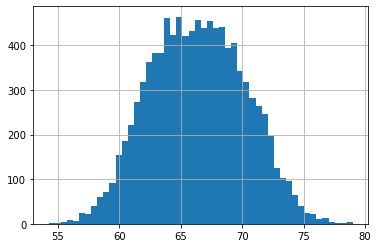

In [6]:
df['Height'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

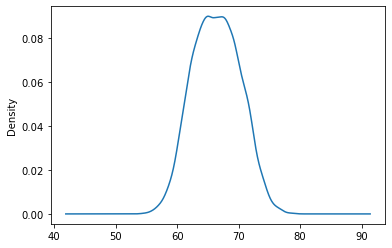

In [7]:
df['Height'].plot(kind='kde')

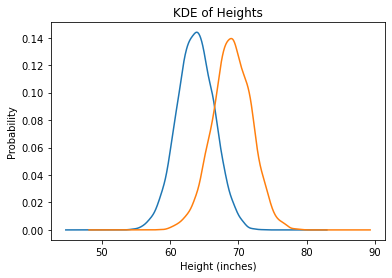

In [33]:
fig, ax = plt.subplots()

df.groupby('Gender')['Height'].plot(kind='kde', ax=ax)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Probability')
_ = ax.set_title('KDE of Heights')

In [9]:
from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df, stratify=df['Gender'], test_size=0.25)

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Height, dtype: object

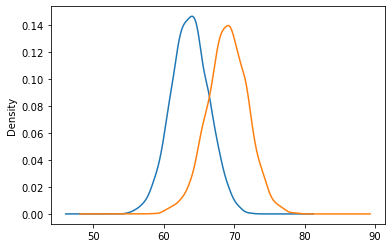

In [10]:
dftrain.groupby('Gender')['Height'].plot(kind='kde')

In [27]:
means = dftrain.groupby('Gender')['Height'].mean().to_dict()
male_mean = means['Male']
female_mean = means['Female']

sigmas = dftrain.groupby('Gender')['Height'].std().to_dict()
male_std = sigmas['Male']
female_std = sigmas['Female']

In [17]:
n_samples = 3750

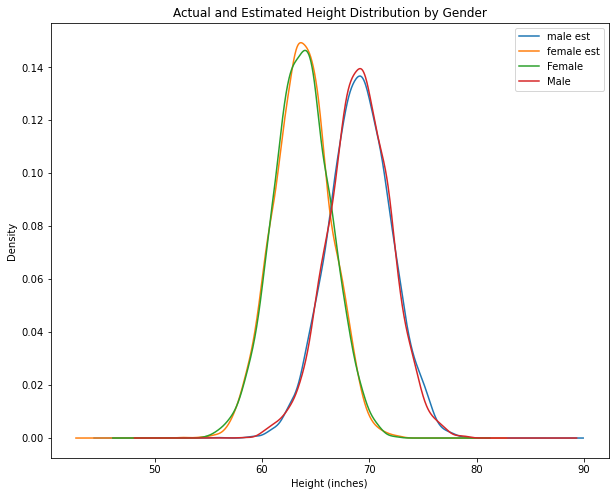

In [34]:
male_distro = np.random.normal(male_mean, male_std, size=(n_samples,))
female_distro = np.random.normal(female_mean, female_std, size=(n_samples,))

fig, ax = plt.subplots(figsize=(10, 8))
pd.Series(male_distro).plot(kind='kde', ax=ax, label='male est')
pd.Series(female_distro).plot(kind='kde', ax=ax, label='female est')

dftrain.groupby('Gender')['Height'].plot(kind='kde', ax=ax)
ax.set_xlabel('Height (inches)')
ax.set_title('Actual and Estimated Height Distribution by Gender')
plt.legend()

In [61]:
h_test = dftest.sample()['Height'].iloc[0]
h_test

69.8992039506227

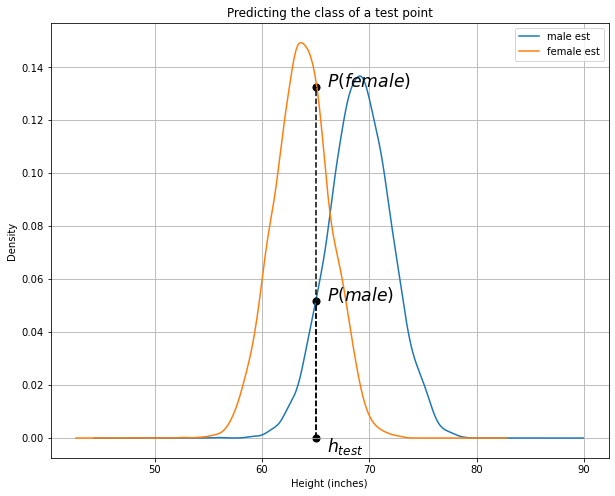

In [82]:
h_test = 65

fig, ax = plt.subplots(figsize=(10, 8))
pd.Series(male_distro).plot(kind='kde', ax=ax, label='male est')
pd.Series(female_distro).plot(kind='kde', ax=ax, label='female est')

rv_male = stats.norm(loc=male_mean, scale=male_std)
p_male = rv_male.pdf(h_test)
rv_female = stats.norm(loc=female_mean, scale=female_std)
p_female = rv_female.pdf(h_test)

ax.scatter(h_test, 0, s=50, c='k')
ax.annotate('$h_{test}$', (h_test, 0), xytext=(h_test + 1, -0.005), fontsize='xx-large')

ax.vlines(h_test, 0, p_male, colors=['k'], linestyles='dashed')
ax.vlines(h_test, 0, p_female, colors=['k'], linestyles='dashed')

ax.scatter(h_test, p_male, s=50, c='k')
ax.annotate('$P(male)$', (h_test, p_male), xytext=(h_test + 1, p_male), fontsize='xx-large')

ax.scatter(h_test, p_female, s=50, c='k')
ax.annotate('$P(female)$', (h_test, p_female), xytext=(h_test + 1, p_female), fontsize='xx-large')

ax.set_xlabel('Height (inches)')
ax.set_title('Predicting the class of a test point')
plt.legend()
plt.grid()

In [83]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(dftrain['Height'].values.reshape(-1, 1), dftrain['Gender'].values)

In [85]:
gnb.theta_

array([[63.69788668],
       [69.03774949]])

In [86]:
male_mean, female_mean

(69.03774948994419, 63.697886684414726)

In [89]:
np.sqrt(gnb.sigma_)

array([[2.66897202],
       [2.88383169]])

In [88]:
male_std, female_std

(2.8842162716938313, 2.669327955082308)